# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [8]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
btc_url_data = requests.get(btc_url)
btc_data = btc_url_data.json()

# Fetch current ETH price
eth_url_data = requests.get(eth_url)
eth_data = eth_url_data.json()

# Compute current value of my crpto
btc_price = float(btc_data['data']['1']['quotes']['USD']['price'])
eth_price = float(eth_data['data']['1027']['quotes']['USD']['price'])

my_btc_value = my_btc*btc_price
my_eth_value = my_eth*eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $58074.00
The current value of your 5.3 ETH is $19317.17


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [18]:
# Format current date as ISO format
today = pd.Timestamp('2021-09-14', tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
ticker_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=today,
    end=today
).df

# Preview DataFrame
ticker_data

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-09-14 00:00:00-04:00  116.07  116.38  116.07  116.28  4036304  448.12   

                                                             
                             high     low   close    volume  
time                                                         
2021-09-14 00:00:00-04:00  448.34  443.22  444.18  67959711

In [19]:
# Pick AGG and SPY close prices
agg_close_price = float(ticker_data['AGG']['close'])
spy_close_price = float(ticker_data['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.28
Current SPY closing price: $444.18


In [20]:
# Compute the current value of shares
my_agg_value = my_agg*agg_close_price
my_spy_value = my_spy*spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22209.00
The current value of your 200 AGG shares is $23256.00


### Savings Health Analysis

In [22]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
my_crypto_value = my_btc_value + my_eth_value
my_shares_value = my_agg_value + my_spy_value

# Create savings DataFrame
df_savings = pd.DataFrame(
    {'amount': [my_crypto_value,my_shares_value],
    'crypto':[my_crypto_value],
    'shares':[my_shares_value]},
    columns=['amount'],
    index=['crypto','shares']
)

# Display savings DataFrame
display(df_savings)

,amount
crypto,77391.175
shares,45465.000


<AxesSubplot:title={'center':'Composition of personal savings'}, ylabel='amount'>

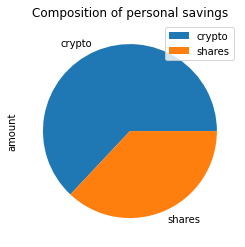

In [25]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title='Composition of personal savings')

In [26]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_shares_value + my_crypto_value

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your savings fund!")
elif total_savings == emergency_fund:
    print("Congratulations!  You have reached your financial goal!")
elif total_savings < emergency_fund:
    print(f"You are ${(emergency_fund-total_savings)} away from reaching your financial goal!")

Congratulations! You have enough money in your savings fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [27]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-09-15', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-09-15', tz='America/New_York').isoformat()

In [29]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
ticker = ['SPY', 'AGG']
timeframe = "1D"

df_stock_data = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date, 
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high     low    close     volume    open   
time                                                                            
2017-09-25 00:00:00-04:00  109.85  110.04  109.82  110.025  3031529.0     NaN   
2017-09-26 00:00:00-04:00  109.95  110.02  109.88  109.990  2074080.0  249.42   
2017-09-27 00:00:00-04:00  109.67  109.75  109.60  109.668  1439682.0  249.88   
2017-09-28 00:00:00-04:00  109.58  109.72  109.51  109.680  1553324.0  249.73   
2017-09-29 00:00:00-04:00  109.74  109.77  109.54  109.640  2969204.0  250.34   

                                                                
                             high      low   close      volume  
time                                                            
2017-09-25 00:00:00-04:00     NaN      NaN     NaN         NaN  
2017-09-26 00:00:00-04:00  249.70  248.805  249.05  36761208.0  
2017-09-27 00:00:00-04:00  250.49  248.870  250.02  51473231.0  
2017-09-28 00:00:00-04:00  250.44  249.630  250.34  25577234.0  
2017-09-29 00:00:00-04:00  251.32  250.130  251.20  41410208.0

In [30]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_simulation = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [31]:
# Printing the simulation input data
MC_simulation.portfolio_data.head()

AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2017-09-25 00:00:00-04:00  109.85  110.04  109.82  110.025  3031529.0   
2017-09-26 00:00:00-04:00  109.95  110.02  109.88  109.990  2074080.0   
2017-09-27 00:00:00-04:00  109.67  109.75  109.60  109.668  1439682.0   
2017-09-28 00:00:00-04:00  109.58  109.72  109.51  109.680  1553324.0   
2017-09-29 00:00:00-04:00  109.74  109.77  109.54  109.640  2969204.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-09-25 00:00:00-04:00          NaN     NaN     NaN      NaN     NaN   
2017-09-26 00:00:00-04:00    -0.000318  249.42  249.70  248.805  249.05   
2017-09-27 00:00:00-04:00    -0.002928  249.88  250.49  248.870  250.02   
2017-09-28 00:00:00-04:00     0.000109  249.73  250.44  249.630  250.34   
2017-09-29 00:00:00-04:00    -0.000365  250.34  251.32  250.130  251.20   

                                                    
                               volume daily_return  
time                                                
2017-09-25 00:00:00-04:00         NaN          NaN  
2017-09-26 00:00:00-04:00  36761208.0          NaN  
2017-09-27 00:00:00-04:00  51473231.0     0.003895  
2017-09-28 00:00:00-04:00  25577234.0     0.001280  
2017-09-29 00:00:00-04:00  41410208.0     0.003435

In [32]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998493,1.000571,1.001693,1.006292,0.988849,0.991816,1.003842,0.999301,1.004925,0.998103,...,1.001908,0.996237,1.015804,0.995173,0.991931,1.004380,0.999150,0.996635,0.990709,0.999721
2,0.989312,0.995781,1.004487,1.004870,0.991878,0.986564,1.010251,1.002627,1.009758,1.003379,...,0.997493,1.009873,1.008300,1.000731,0.987906,1.002540,1.001618,1.002850,0.994349,1.004429
3,0.989689,0.981609,1.003954,1.013825,0.997271,0.983260,1.000529,0.998147,1.002571,0.995520,...,0.997541,1.008303,1.003309,1.002012,0.977377,1.003054,0.998695,0.999244,1.001986,1.007608
4,0.991584,0.976560,1.002203,1.015274,0.993432,0.980400,1.003341,0.999908,1.004369,1.003409,...,0.994938,1.007970,1.003228,1.005756,0.978656,1.003014,0.992324,0.997390,0.996555,1.009073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,17.476169,16.298434,7.986654,10.208802,17.396819,8.119446,7.088928,34.706987,6.819196,9.213210,...,3.261395,5.241512,5.359982,5.688033,11.903977,16.336422,5.937880,14.660035,11.258254,11.123194
7557,17.545848,16.324789,7.946804,10.309834,17.330603,8.170354,7.121291,34.437442,6.909647,9.287813,...,3.261084,5.267095,5.426817,5.715819,11.987124,16.437242,5.931108,14.762763,11.233624,11.187011
7558,17.545455,16.224041,7.905300,10.289166,17.261986,8.281350,7.136343,34.357536,6.915695,9.454877,...,3.254566,5.251843,5.433533,5.698545,11.994100,16.467487,5.898851,14.639521,11.268377,11.188847
7559,17.628709,16.306201,7.827857,10.267039,17.402189,8.302111,7.159847,34.213743,6.850210,9.497560,...,3.257164,5.240425,5.451703,5.714885,12.011254,16.357305,5.904091,14.760378,11.222563,11.217302


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

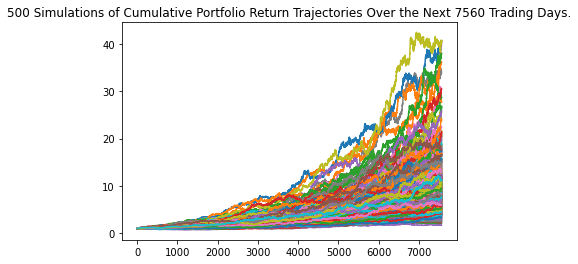

In [33]:
# Plot simulation outcomes
MC_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

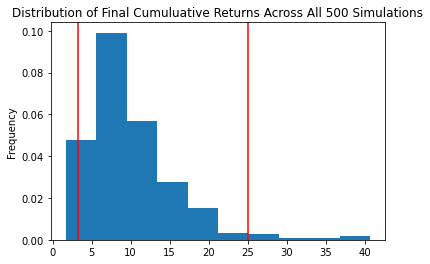

In [34]:
# Plot probability distribution and confidence intervals
MC_simulation.plot_distribution()

### Retirement Analysis

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_simulation.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           500.000000
mean             10.129340
std               5.817691
min               1.690652
25%               6.174646
50%               8.634841
75%              12.096649
max              40.658867
95% CI Lower      3.281034
95% CI Upper     24.975036
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [38]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $65620.69 and $499500.72


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [39]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $98431.03 and $749251.08


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [40]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [41]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995938,0.993699,0.992633,1.003439,0.998441,1.007353,1.002647,0.999224,1.005621,1.001662,...,1.002306,0.999593,0.995822,0.995887,1.005512,0.995223,1.007078,0.998154,1.009536,1.001247
2,0.996669,0.985602,0.999643,1.011262,1.002445,1.007023,1.006697,1.005377,1.007057,0.993823,...,1.009725,1.001361,0.994928,0.985526,1.008716,1.003881,1.002586,0.993651,1.013364,1.002429
3,1.001336,0.978875,1.004085,1.014722,1.006902,1.003914,1.004152,0.994966,1.004166,0.981889,...,1.005481,0.996495,0.995118,0.997132,1.010030,1.005944,1.004075,0.984733,1.013648,1.010444
4,1.016804,0.984181,1.005777,1.005649,1.006827,1.012225,1.006062,0.992174,1.001677,0.983726,...,1.002703,1.000143,0.995361,1.002299,1.016035,1.004571,1.001574,0.981986,1.019254,1.006867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.243034,1.434478,1.641030,1.334331,0.990110,1.313900,1.581190,1.760351,1.528483,1.319164,...,1.629738,1.570509,1.755060,1.311749,1.271242,1.430197,1.264253,1.679025,1.849600,1.937422
1257,1.246859,1.452096,1.653613,1.327468,0.990472,1.323946,1.585720,1.745940,1.537087,1.314712,...,1.615487,1.568960,1.752056,1.300914,1.269063,1.426946,1.249540,1.675722,1.834355,1.946671
1258,1.254464,1.450471,1.641396,1.339069,0.999414,1.334340,1.596872,1.753411,1.529867,1.296896,...,1.612425,1.590316,1.760017,1.299366,1.261681,1.425781,1.253708,1.668202,1.841287,1.946679
1259,1.242466,1.461939,1.652641,1.335915,1.000646,1.338865,1.600485,1.767616,1.540813,1.298985,...,1.606086,1.602373,1.748309,1.293129,1.257993,1.420843,1.268854,1.663392,1.829964,1.953094


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

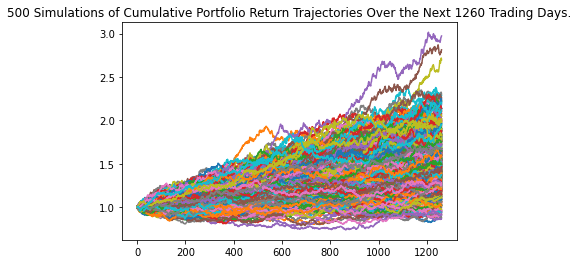

In [42]:
# Plot simulation outcomes
MC_5yr.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

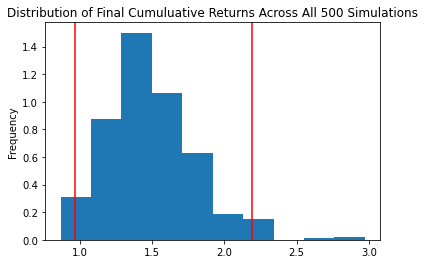

In [43]:
# Plot probability distribution and confidence intervals
MC_5yr.plot_distribution()

In [45]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_5yr = MC_5yr.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_5yr)

count           500.000000
mean              1.490482
std               0.302963
min               0.867264
25%               1.288293
50%               1.461143
75%               1.653751
max               2.972510
95% CI Lower      0.968079
95% CI Upper      2.190142
Name: 1260, dtype: float64


In [47]:
# Set initial investment
initial_investment_5yr = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_stats_5yr[8]*initial_investment_5yr,2)
ci_upper_five = round(summary_stats_5yr[9]*initial_investment_5yr,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5yr} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58084.72 and $131408.51


### Ten Years Retirement Option

In [48]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [49]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995167,1.004468,1.008793,1.005515,1.002625,1.005013,0.995276,1.010070,0.999959,1.010997,...,0.986371,0.988485,1.001181,1.005162,0.998618,1.004073,1.004511,1.012279,0.999703,0.995223
2,0.992614,1.002933,1.011922,0.999307,1.000726,1.008445,0.993049,1.013158,1.006306,1.012737,...,0.980486,0.981142,1.011459,1.004425,1.001703,1.014201,0.995771,1.010634,0.999513,0.999761
3,0.987448,1.000030,1.019565,0.999879,1.002460,1.021264,0.985977,1.016278,0.998186,1.025589,...,0.989898,0.977922,1.012921,1.013512,0.998319,1.024556,0.990469,1.010642,0.992110,1.007422
4,0.986099,0.997811,1.017649,0.999088,1.006722,1.008085,0.992972,1.018660,0.996053,1.029003,...,0.989891,0.985289,1.018303,1.013697,0.990836,1.016997,0.984222,1.017650,0.997153,1.009212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.299925,2.798679,2.469292,2.715266,1.904711,1.795646,2.562736,2.524761,3.355262,2.481598,...,1.832128,2.087117,1.665875,1.658302,1.879437,1.573967,2.012129,2.035130,2.642692,1.982633
2517,2.295135,2.786618,2.464303,2.693249,1.905582,1.789525,2.559349,2.509453,3.333305,2.488408,...,1.838659,2.075733,1.659930,1.655376,1.888578,1.583236,2.014521,2.059297,2.639321,1.989858
2518,2.295191,2.791163,2.495689,2.701575,1.911291,1.796100,2.554828,2.489965,3.346496,2.480116,...,1.834457,2.083539,1.646081,1.664517,1.898638,1.568591,1.998432,2.053051,2.638954,1.989363
2519,2.295443,2.807841,2.505047,2.705561,1.910679,1.770485,2.565360,2.520264,3.333439,2.482891,...,1.828793,2.082783,1.641107,1.663015,1.878670,1.567572,1.998642,2.064332,2.648502,1.993637


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

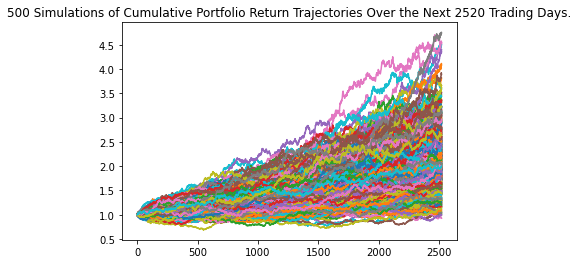

In [50]:
# Plot simulation outcomes
MC_10yr.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

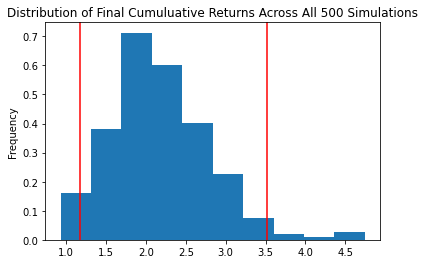

In [51]:
# Plot probability distribution and confidence intervals
MC_10yr.plot_distribution()

In [52]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_10yr = MC_10yr.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_10yr)

count           500.000000
mean              2.182417
std               0.621864
min               0.928314
25%               1.758228
50%               2.105904
75%               2.529693
max               4.746112
95% CI Lower      1.172883
95% CI Upper      3.512812
Name: 2520, dtype: float64


In [53]:
# Set initial investment
initial_investment_10yr = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_stats_10yr[8]*initial_investment_10yr,2)
ci_upper_ten = round(summary_stats_10yr[9]*initial_investment_10yr,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10yr} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $70372.98 and $210768.73
